<center>
    <img src="http://sct.inf.utfsm.cl/wp-content/uploads/2020/04/logo_di.png" style="width:60%">
    <h1> INF-280 - Estadística Computacional </h1>
    <h2> Análisis de Datos y Test de Hipótesis </h2>
    <h4> Ignacio Cea Ruiz </h4>
</center>

## Introducción
Los laboratorios de estadística computacional (LEC) tienen por objetivo principal analizar datos utilizando técnicas de visualización y evidenciar el comportamiento estocástico de experimentos aleatorios mediante simulaciones computacionales. Las experiencias buscan medir la habilidad de programación en Python y sus librerías, la capacidad de análisis estadístico y la comprensión de documentaciones, artículos y papers.

> Recuerde que los laboratorios tienen una ponderación de 25% en la nota final del ramo y que, además, el promedio de estos debe ser mayor o igual a 55 para aprobar el ramo

## Reglamento
1. El desarrollo de los laboratorios debe ser en **Python**.
2. El formato de entrega es un **archivo .ipynb**, es decir, un Jupyter Notebook.
3. El nombre del archivo de entrega del laboratorio *i* debe seguir el siguiente formato: *lec-i-nombregrupo.ipynb*.
4. Se recomienda seguir las recomendaciones de estilo descritas en [PEP 8](https://www.python.org/dev/peps/pep-0008/) y [Type hints](https://docs.python.org/3/library/typing.html) a la hora de programar.
5. El tiempo para la realización de los laboratorios es extenso, por lo que solo se recibirán entregas hasta las 23:59 del día de entrega **a menos que se especifique lo contrario**. Entregas fuera del plazo serán calificadas con nota 0.
6. Es de exclusiva responsabilidad del equipo de trabajo escribir los desarrollos y el código correspondiente en el notebook. Código o desarrollos en otras plataformas NO serán revisados.
7. Antes de entregar su laboratorio verifique su **reproducibilidad**. Jupyter Notebooks con errores a la hora de ejecutarse serán penalizados con descuentos.
8. Solo un integrante por grupo debe realizar la entrega por Aula.
9. El código entregado es solo una guía, se puede modificar sin problemas. Así mismo, para cada ejercicio usted puede crear las funciones que estime conveniente. También puede agregar celdas de markdown para explicar y comentar según corresponda.
10. No incluya prints innecesarios como parte de su entrega final.

## Toolbox

La caja de herramientas (stack de tecnologias) para el presente laboratorio está conformada por:
1. [Python](https://www.python.org/doc/).
2. [Numpy](https://numpy.org/doc/stable/).
3. [Scipy](https://docs.scipy.org/doc/scipy/reference/index.html)
4. [Matplotlib](https://matplotlib.org/stable/contents.html).
5. [Seaborn](https://seaborn.pydata.org/api.html).

Usted es libre de utilizar el entorno de desarrollo que prefiera, sin embargo se recomienda el uso de [Anaconda](https://www.anaconda.com/products/individual#Downloads), ya que incluye las herramientas necesarias para desarrollar los laboratorios, permite una rápida instalación de otras librerías y es compatible con una gran variedad de sistemas operativos.

Usted también es libre de usar tanto Jupyer Notebook (incluido en la instalación individual de Anaconda) como otras alternativas de desarrollo de archivos `.ipynb` tales como [Colab](https://colab.research.google.com/) o [Visual Studio Code](https://code.visualstudio.com/). En el caso de trabajar remotamente se recomienda utilizar Git para trabajar de manera exitosa y ordenada en equipo.

Las librerías se introducirán amigablemente, no se asume ningún tipo de conocimiento previo en las tecnologías presentes en nuestra toolbox salvo por Python, sin embargo, se busca promover la lectura de documentaciones de librerías.

## Experiencia



### 0. Importación de las librerías

A continuación se importan las librerías que necesitaremos para el correcto desarrollo de esta experiencia. Se recomienda utilizar los aliases por defecto.

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

La librería que será central para la primera parte del desarrollo de este, su último LEC, es ✨`pandas`✨. Esta librería esta construida sobre las estructuras de datos provistas por `numpy`, proveyendo al cientista de datos una robusta serie de herramientas destinadas al **análisis de datos** tabulados de gran volumen.

En la segunda parte, exploraremos los **test de hipótesis** desde un punto de vista conceptual y experimental.

### 1. Análisis y visualizaciones de datos con Pandas **(55 pts)**

#### 1.1. Cargar datos

A modo de introducción al análisis de datos en Python trabajaremos con el dataset `top_100_anime_movie.csv`, el cual contiene datos respecto a las 100 mejores películas animadas japonesas de todos los tiempos, según su ranking [IMDB](https://es.wikipedia.org/wiki/Internet_Movie_Database). Este dataset fue obtenido desde [Kaggle](https://www.kaggle.com/datasets/ayessa/top-100-anime-movies-imdb).

El primer paso consiste en leer el archivo csv mediante la función `read_csv()` y almacenarlo en una variable conveniente.

In [2]:
anime_movies = pd.read_csv('top_100_anime_movie.csv')

La función permite cargar datasets desde archivos en [formato csv](https://es.wikipedia.org/wiki/Valores_separados_por_comas), los cuales son almacenados como [dataframes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). También tiene parámetros opcionales que permiten personalizar la operación de lectura dependiendo de las características de la data (se recomienda leer la documentación asociada).

#### 1.2. Explorando el dataset

Tal como la librería Numpy está construida sobre los NumPy Arrays, Pandas está construida sobre un objeto principal llamado [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html). Este objeto es muy similar a un `ndarray` unidimensional, pero con funcionalidades adicionales tales como la posibilidad de que sus valores sean indexados mediante etiquetas especificadas por el programador.

Luego, tenemos los objetos llamados [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). Estos permiten almacenar datos tabulados, donde tanto columnas como filas pueden ser accedidas mediante alguna etiqueta específica. Los datos pueden ser de distintos tipos, pero cada columna (que es esencialmente una `Series`) solo puede contener datos del mismo tipo.

> Un punto importante de ambas estructuras de datos es que son **mutables**, por lo tanto, se puede acceder directamente a sus elementos para editarlos.

Una vez cargados los datos en un *DataFrame*, podemos proceder a revisar la información contenida en ellos.

* El método `head()` permite visualizar las primeras entradas (filas) de la tabla:

In [3]:
anime_movies.head()

,rank,title,rating,votes,year,minutes,genre,gross
0,1,Ramayana: The Legend of Prince Rama,9.2,"7,549",1993,97.0,"Animation, Action, Adventure",NaN
1,2,Spirited Away,8.6,"756,112",2001,125.0,"Animation, Adventure, Family",$10.06M
2,3,Meiji Tokyo Renka Movie: Yumihari no Serenade,8.5,39,2015,60.0,"Animation, Fantasy, Romance",NaN
3,4,"Natsu e no tunnel, Sayonara no deguchi",8.5,23,2022,83.0,Animation,NaN
4,5,Attack on Titan: Chronicle,8.5,"10,421",2020,122.0,"Animation, Action, Adventure",NaN


* Podemos observar que se asigna una columna adicional sin nombre que contiene los índices por defecto (0, 1, 2...) para cada entrada. Podemos eliminarla asignando como índice la columna `rank` de la siguiente forma:

In [4]:
anime_movies.set_index('rank', inplace=True) # ¿Para qué sirve el parámetro inplace=True?
anime_movies.head()

,title,rating,votes,year,minutes,genre,gross
rank,,,,,,,
1,Ramayana: The Legend of Prince Rama,9.2,"7,549",1993,97.0,"Animation, Action, Adventure",NaN
2,Spirited Away,8.6,"756,112",2001,125.0,"Animation, Adventure, Family",$10.06M
3,Meiji Tokyo Renka Movie: Yumihari no Serenade,8.5,39,2015,60.0,"Animation, Fantasy, Romance",NaN
4,"Natsu e no tunnel, Sayonara no deguchi",8.5,23,2022,83.0,Animation,NaN
5,Attack on Titan: Chronicle,8.5,"10,421",2020,122.0,"Animation, Action, Adventure",NaN


* Podemos revisar el atributo  `shape` para comprobar que tenemos 100 entradas en la tabla (además de ver cuántas columnas tenemos, excluyendo el índice `rank`):

In [5]:
anime_movies.shape

(100, 7)

* Para acceder a una columna en particular del *DataFrame*:

In [6]:
anime_movies['title']

rank
1                    Ramayana: The Legend of Prince Rama
2                                          Spirited Away
3          Meiji Tokyo Renka Movie: Yumihari no Serenade
4                 Natsu e no tunnel, Sayonara no deguchi
5                             Attack on Titan: Chronicle
                             ...                        
96     Mobile Suit Gundam: The Origin IV - Eve of Des...
97                               Dou Kyu Sei: Classmates
98            The Shimajiro Movie: Shimajiro in Bookland
99                                        In This Corner
100                                         Asatte Dansu
Name: title, Length: 100, dtype: object

* Al seleccionar una columna, podemos acceder a sus elementos utilizando el operador de indexación una vez más (de acuerdo al índice que se esté utilizando, en nuestro caso los valores de la columna `rank`):

In [7]:
anime_movies['title'][1]

'Ramayana: The Legend of Prince Rama'

* Para seleccionar registros (filas) basado en su posición dentro del DataFrame, utilizamos el método `iloc[]`:

In [8]:
anime_movies.iloc[0]

title      Ramayana: The Legend of Prince Rama
rating                                     9.2
votes                                    7,549
year                                      1993
minutes                                   97.0
genre             Animation, Action, Adventure
gross                                      NaN
Name: 1, dtype: object

Este método también puede utilizarse para obtener distintos *slices* y columnas específicas siguiendo la semántica dada en la documentación.

* Para seleccionar registros basado en los índices (en nuestro ejemplo, los valores de la columna `rank` y los nombres de las columnas), utilizamos el método `loc[]`.

In [9]:
anime_movies.loc[1]

title      Ramayana: The Legend of Prince Rama
rating                                     9.2
votes                                    7,549
year                                      1993
minutes                                   97.0
genre             Animation, Action, Adventure
gross                                      NaN
Name: 1, dtype: object

**1.2.1)** Utilice el método `iloc` para obtener una vista de los últimos 5 registros (los que están al final del dataframe), mostrando únicamente el título y el rating de cada película. Luego, escriba una expresión que le permita obtener el mismo resultado, pero con el método `loc`. ¿En qué se diferencian ambos métodos?, ¿cuáles son las ventajas y desventajas de usar uno u otro? **(6 pts.)**

In [10]:
# Método iloc

anime_movies.iloc[anime_movies.shape[0]-5:]


,title,rating,votes,year,minutes,genre,gross
rank,,,,,,,
96,Mobile Suit Gundam: The Origin IV - Eve of Des...,7.7,462,2016,85.0,"Animation, Action, Drama",NaN
97,Dou Kyu Sei: Classmates,7.7,"2,742",2016,60.0,"Animation, Drama, Music",NaN
98,The Shimajiro Movie: Shimajiro in Bookland,7.7,25,2016,61.0,"Animation, Family",NaN
99,In This Corner,7.7,"11,242",2016,129.0,"Animation, Drama, Family",NaN
100,Asatte Dansu,7.7,10,1991,45.0,"Animation, Comedy, Romance",NaN


In [11]:
#Método loc
anime_movies.loc[anime_movies.shape[0]-4:]

,title,rating,votes,year,minutes,genre,gross
rank,,,,,,,
96,Mobile Suit Gundam: The Origin IV - Eve of Des...,7.7,462,2016,85.0,"Animation, Action, Drama",NaN
97,Dou Kyu Sei: Classmates,7.7,"2,742",2016,60.0,"Animation, Drama, Music",NaN
98,The Shimajiro Movie: Shimajiro in Bookland,7.7,25,2016,61.0,"Animation, Family",NaN
99,In This Corner,7.7,"11,242",2016,129.0,"Animation, Drama, Family",NaN
100,Asatte Dansu,7.7,10,1991,45.0,"Animation, Comedy, Romance",NaN


**Respuesta**:

iloc permite el acceso mediante indices para obtener valores dierectamente de las series, en cambio loc permite utilizar valores de columnas y expresiones booleanas para realizar comparaciones y filtrado de datos, por tanto depende de la situacion del análisis el método que se utilizara y la implementacion de ambas funciones.  
Una ventaja del loc, es que permite acceder a valores específicos, pero a la vez  una desventaja es que hay que conocer el atributo que queremos evaluar o alguna condición sobre el mismo.

 La diferencia entre el iloc y el loc, es que el primero, trabaja utilizando indices para obtener informacion de las series del dataset, y el segundo, permite acceder a títulos de columnos y adicionalmente ingresar expresiones booleanas para el pre-procesamiento y limpieza de datos.  
Una ventaja del loc, es que permite acceder a valores específicos, pero a la vez  una desventaja es que hay que conocer el atributo que queremos evaluar o alguna condición sobre el mismo.

* También podemos utilizar expresiones condicionales dentro de `loc[...]`, de forma de mostrar solamente registros que cumplan con una condición dada.

**1.2.2)** Muestre el título y el rating de todas las películas que duran más de 120 minutos. **(4 pts)**

In [12]:
anime_movies.loc[anime_movies['minutes']>120,["title","rating"]]

,title,rating
rank,,
2,Spirited Away,8.6
5,Attack on Titan: Chronicle,8.5
10,Princess Mononoke,8.4
24,A Silent Voice: The Movie,8.1
28,Girls und Panzer Compilation Movie,8.1
31,Zoku Owarimonogatari,8.0
39,The Tale of The Princess Kaguya,8.0
40,Evangelion: 3.0+1.01 Thrice Upon a Time,8.0
42,The Disappearance of Haruhi Suzumiya,8.0


* Podemos revisar el atributo `dtypes` para visualizar el tipo de datos almacenados en cada columna.

In [13]:
anime_movies.dtypes

title       object
rating     float64
votes       object
year         int64
minutes    float64
genre       object
gross       object
dtype: object

Es común que, al importar datasets de distintas fuentes, usted deba realizar un **pre-procesamiento** de los datos para poder analizarlos correctamente.

❗ La columna `votes` almacena la cantidad de votos por cada película pero, como podrá observar, en vez de ser del tipo `int`, esta columna es del tipo `object`, ya que almacena el entero como un string de caracteres numéricos, utilizando una `,` para agrupar los dígitos de 3 en 3. 

**1.2.3)** Modifique la columna `votes` del dataframe `anime_movies` de tal forma que sus valores sean puramente números enteros. Asegúrese de que el cambio sea correctamente almacenado en el dataframe. **(5 pts.)**

*Hint*: Los métodos `map()` y `astype()` le serán de utilidad.

In [14]:
anime_movies['votes']=anime_movies['votes'].map(lambda x:x.replace(',','')).astype('int64')

In [15]:
anime_movies

,title,rating,votes,year,minutes,genre,gross
rank,,,,,,,
1,Ramayana: The Legend of Prince Rama,9.2,7549,1993,97.0,"Animation, Action, Adventure",NaN
2,Spirited Away,8.6,756112,2001,125.0,"Animation, Adventure, Family",$10.06M
3,Meiji Tokyo Renka Movie: Yumihari no Serenade,8.5,39,2015,60.0,"Animation, Fantasy, Romance",NaN
4,"Natsu e no tunnel, Sayonara no deguchi",8.5,23,2022,83.0,Animation,NaN
5,Attack on Titan: Chronicle,8.5,10421,2020,122.0,"Animation, Action, Adventure",NaN
...,...,...,...,...,...,...,...
96,Mobile Suit Gundam: The Origin IV - Eve of Des...,7.7,462,2016,85.0,"Animation, Action, Drama",NaN
97,Dou Kyu Sei: Classmates,7.7,2742,2016,60.0,"Animation, Drama, Music",NaN
98,The Shimajiro Movie: Shimajiro in Bookland,7.7,25,2016,61.0,"Animation, Family",NaN


* El método `describe()` aplicado a una columna del dataframe muestra una caracterización estadística de los datos que contiene, según el tipo de dato asociado.

In [16]:
anime_movies['votes'].describe()

count       100.000000
mean      41306.550000
std      107333.445459
min          10.000000
25%         414.500000
50%        2711.000000
75%       18069.500000
max      756112.000000
Name: votes, dtype: float64

In [17]:
anime_movies['genre'].describe()

count                              100
unique                              33
top       Animation, Action, Adventure
freq                                17
Name: genre, dtype: object

* Cuando hay datos ausentes, pandas asigna el valor `NaN` a las casillas correspondientes. Las funciones `pd.isnull()` y `pd.notnull()` permiten filtrar dichos registros.

❗ La columna `gross` muestra las ganancias percibidas por cada película en millones de dólares. El problema es que varios registros tienen un valor `NaN` en dicho espacio y, aquellas que muestran un valor, lo hacen mediante un formato de string `$...M`.

**1.2.4)** Almacene en un nuevo dataframe todos los registros de `anime_movies` que contienen datos NO nulos para la columna `gross`. Luego, modifique los valores de dicha columna de tal forma que el tipo de dato sea `float`, lo cual permitirá analizar dichos datos correctamente. **(6 pts.)**

In [18]:
anime_movies_gross=anime_movies.loc[anime_movies['gross'].notnull()]

In [19]:
anime_movies.loc[1]

title      Ramayana: The Legend of Prince Rama
rating                                     9.2
votes                                     7549
year                                      1993
minutes                                   97.0
genre             Animation, Action, Adventure
gross                                      NaN
Name: 1, dtype: object

In [20]:
anime_movies_gross['gross']=anime_movies_gross['gross'].map(lambda x:x.replace('$',''))
anime_movies_gross['gross']=anime_movies_gross['gross'].map(lambda x:x.replace('M','')).astype('float64');

C:\Users\chunc\AppData\Local\Temp\ipykernel_10744\313297341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_movies_gross['gross']=anime_movies_gross['gross'].map(lambda x:x.replace('$',''))
C:\Users\chunc\AppData\Local\Temp\ipykernel_10744\313297341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_movies_gross['gross']=anime_movies_gross['gross'].map(lambda x:x.replace('M','')).astype('float64');


In [21]:
anime_movies_gross

,title,rating,votes,year,minutes,genre,gross
rank,,,,,,,
2,Spirited Away,8.6,756112,2001,125.0,"Animation, Adventure, Family",10.06
9,Your Name.,8.4,265332,2016,106.0,"Animation, Drama, Fantasy",5.02
10,Princess Mononoke,8.4,392732,1997,134.0,"Animation, Action, Adventure",2.38
19,Demon Slayer the Movie: Mugen Train,8.2,57328,2020,117.0,"Animation, Action, Adventure",47.70
21,Howl's Moving Castle,8.2,393001,2004,119.0,"Animation, Adventure, Family",4.71
30,My Neighbor Totoro,8.1,337655,1988,86.0,"Animation, Comedy, Family",1.11
33,I Want to Eat Your Pancreas,8.0,17152,2018,109.0,"Animation, Drama, Family",0.28
39,The Tale of The Princess Kaguya,8.0,47044,2013,137.0,"Animation, Drama, Family",1.51
41,Puella Magi Madoka Magica the Movie Part 2: Et...,8.0,1530,2012,109.0,"Animation, Fantasy, Mystery",0.06


#### 1.3. Visualizando la información contenida en un dataset

Visualizar la información almacenada en un *pandas dataframe* no es difícil, sobre todo cuando tenemos a nuestra disposición librerías como `matplotlib` o `seaborn`.

* La función `sns.histplot()` permite generar un histograma simple, tan solo debemos pasarle la columna del dataframe que queremos graficar.

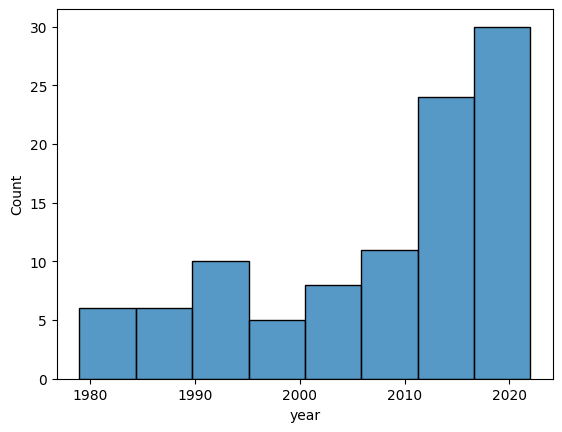

In [22]:
sns.histplot(anime_movies['year']);

* La función `sns.kdeplot()` permite graficar una estimación de densidad de kernel, el cual muestra la distribución aproximada de los datos (como un histograma pero suavizado).

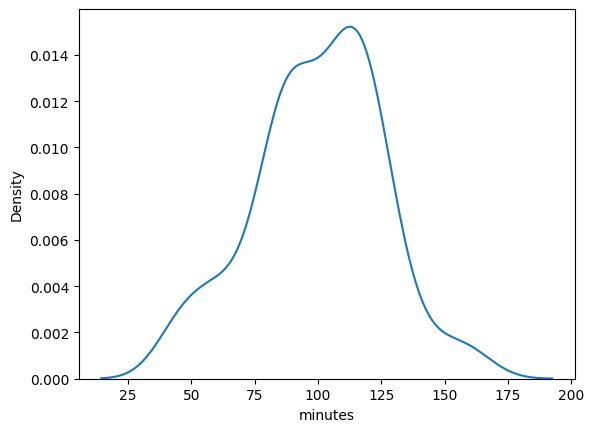

In [23]:
sns.kdeplot(anime_movies['minutes']);

* La función `sns.boxplot()` permite graficar un **boxplot**, también llamado gráfico de caja y bigotes, el cual muestra la distribución de los datos mediante una visualización de los datos atípicos (*outliers*), el rango (sin *outliers*), el rango intercuartil, los cuartiles (Q1 y Q3), la mediana (Q2) y los valores mínimo y máximo.

count     100.000000
mean     2007.810000
std        12.233168
min      1979.000000
25%      1997.750000
50%      2013.000000
75%      2018.000000
max      2022.000000
Name: year, dtype: float64


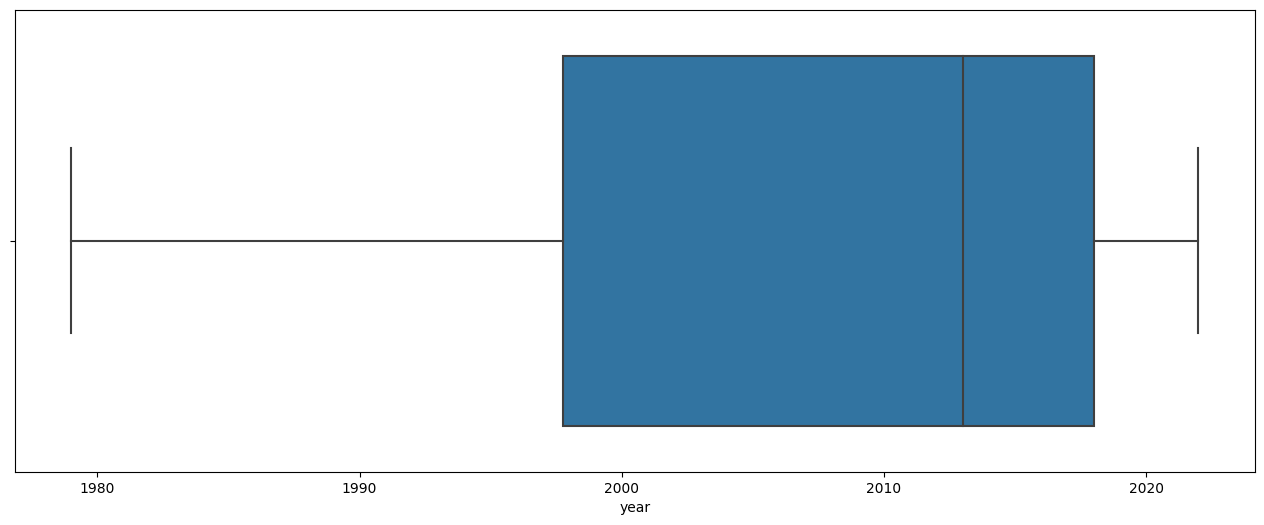

In [24]:
print(anime_movies['year'].describe())

plt.figure(figsize=(16,6))
sns.boxplot(x=anime_movies['year']);

**1.3.1)** ¿Qué puede concluir respecto a la distribución de los años en que fueron producidas las películas del dataset? Considere todos los estadísticos que se visualizan en el boxplot (máximo, mínimo, mediana, cuartiles). **(4 pts.)**

**Respuesta**: Se aprecia que existen outliers minimos y máximos, estos son los primeros animes creados y los últimos lanzados respectivamente, sin embargo considerando la concentración de los Q1,Q2 y Q3 notamos que durante la última decada se han producido bastantes series animadas, en paricular notamos que más de la mitad de las producciones del dataset se encuentran desde 2010, lo que tambien se representa en el boxpot, con una media aparente entre 2010 y 2015 

**1.3.2)** Genere un gráfico de barras o *barplot* que muestre las frecuencias de los géneros que aparecen en el dataframe. Como podrá observar, la data respecto a los géneros de cada película está en el formato `'gen1, gen2, ...'`, por lo que cada una podrá pertenecer a más de un género. Adicionalmente, todas las películas del dataset pertenecen a la categoría *Animation*, lo cual es obvio dado que se trata de películas animadas; no considere esta categoría en el gráfico. Utilice la función `sns.barplot(x=..., y=...)` para generar el gráfico. **(10 pts.)**

*Hints*: 
* Debe almacenar el nombre único de cada género (`x`) y sus ocurrencias respectivas (`y`).
* Usar `plt.figure(figsize=(..., ...))` le permitirá setear las dimensiones de su gráfico.

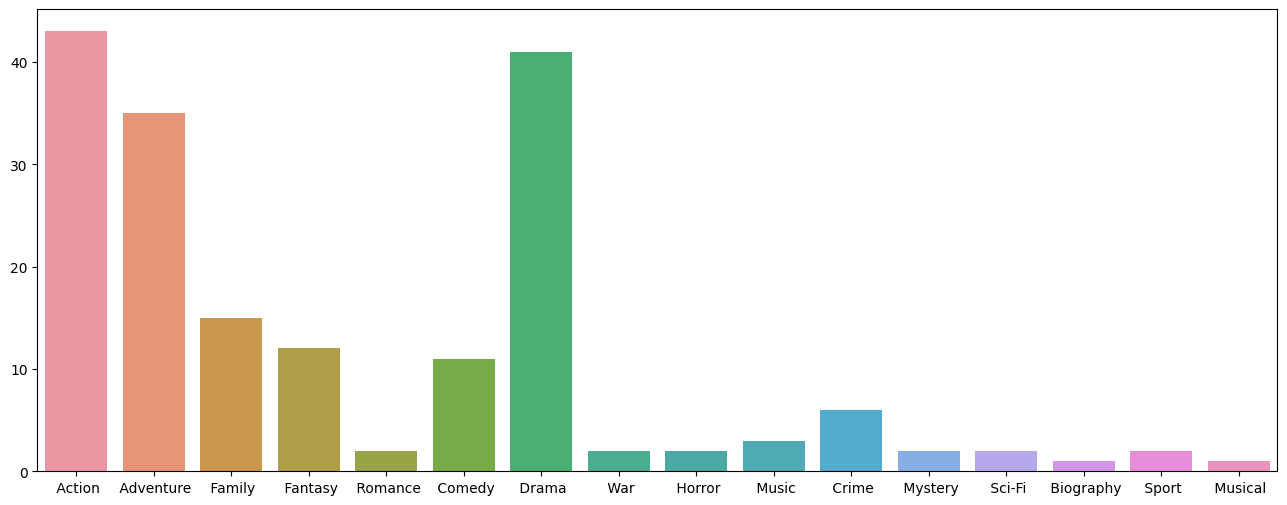

In [25]:
value = anime_movies['genre'].map(lambda x:x.split(',') )
x = dict()
for anime in value:
    for genero in anime:
        if genero in x:
            x[genero]+=1
        else:
            x[genero]=1
x_genero = []
y_repeticion = []
for x2,y in x.items():
    #print(y)
    x_genero.append(x2)
    y_repeticion.append(y)
plt.figure(figsize=(16,6))
sns.barplot(x=x_genero[1:], y=y_repeticion[1:]);


**1.3.3)** Obtenga un resumen estadístico de las ganancias obtenidas por las películas según el dataframe creado en el ítem **1.2.4**. Presente uno o más gráficos que le permitan visualizar las principales características de la data. Si se evidencia asimetría, ¿de qué tipo es?, ¿qué puede concluir al respecto?, ¿qué estadística es más **robusta**, la media o la mediana (fundamente)?, ¿hay presencia de outliers? **(15 pts.)**

count    20.000000
mean      7.113000
std      13.688264
min       0.060000
25%       0.355000
50%       0.890000
75%       4.787500
max      47.700000
Name: gross, dtype: float64

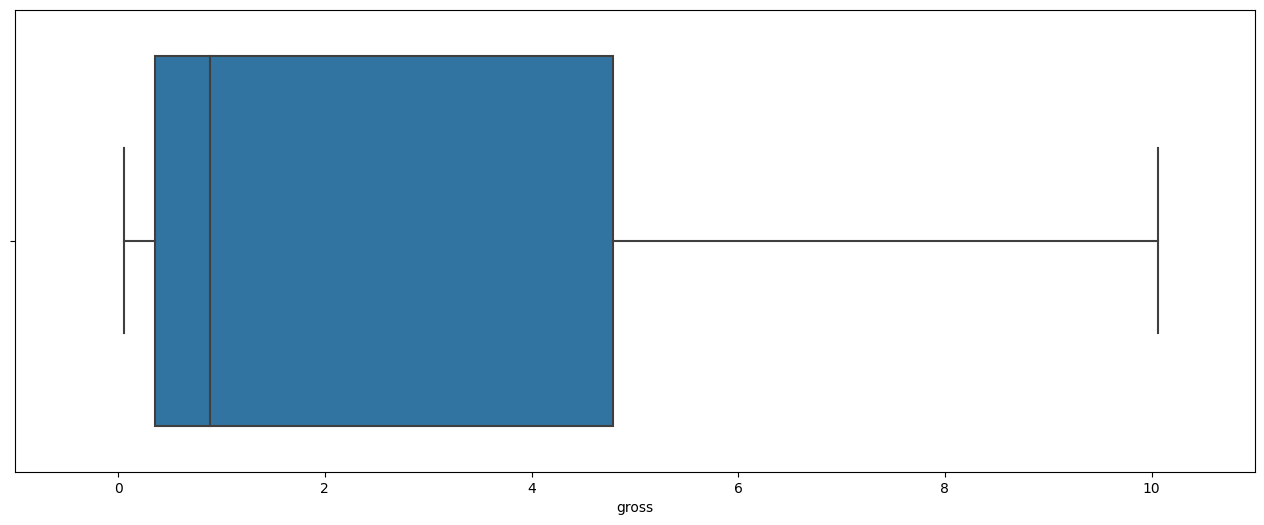

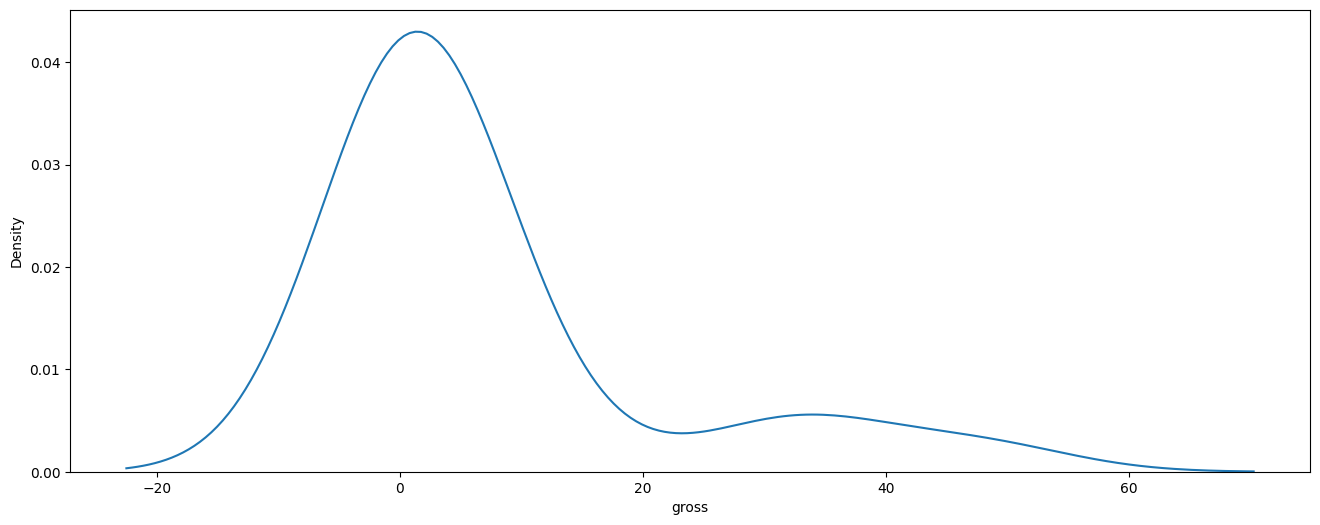

In [26]:
plt.figure(figsize=(16,6))
graf=sns.boxplot(x=anime_movies_gross['gross']);
graf.set_xlim([-1, 11])  


plt.figure(figsize=(16,6))
sns.kdeplot(anime_movies_gross['gross']);

anime_movies_gross['gross'].describe()

**Respuesta**:   
El tipo de asmimetría es positivo, pues al realizar el eje en la media aprox 7.0, se aprecia que la cola queda hacia los positivos, considerandose una asimetría positiva, eso significa que existen valores por sobre la media que inducen un sesgo sobre el resultado al considerar solo la media, por tanto la mediana es más robusta en este caso, pues permite obtener el valor medio de los datos y sin considerar una posible diferencia entre valores inducida por valores extremos y/o outliers.

**1.3.4)** Obtenga un resumen estadístico de la columna `votes`. Luego, genere un boxplot que le permita visualizar la distribución de la data. Analice y comente respecto a los resultados obtenidos (máximo, mínimo, rango, cuartiles, media y desviación estándar). **(5 pts.)**

count       100.000000
mean      41306.550000
std      107333.445459
min          10.000000
25%         414.500000
50%        2711.000000
75%       18069.500000
max      756112.000000
Name: votes, dtype: float64

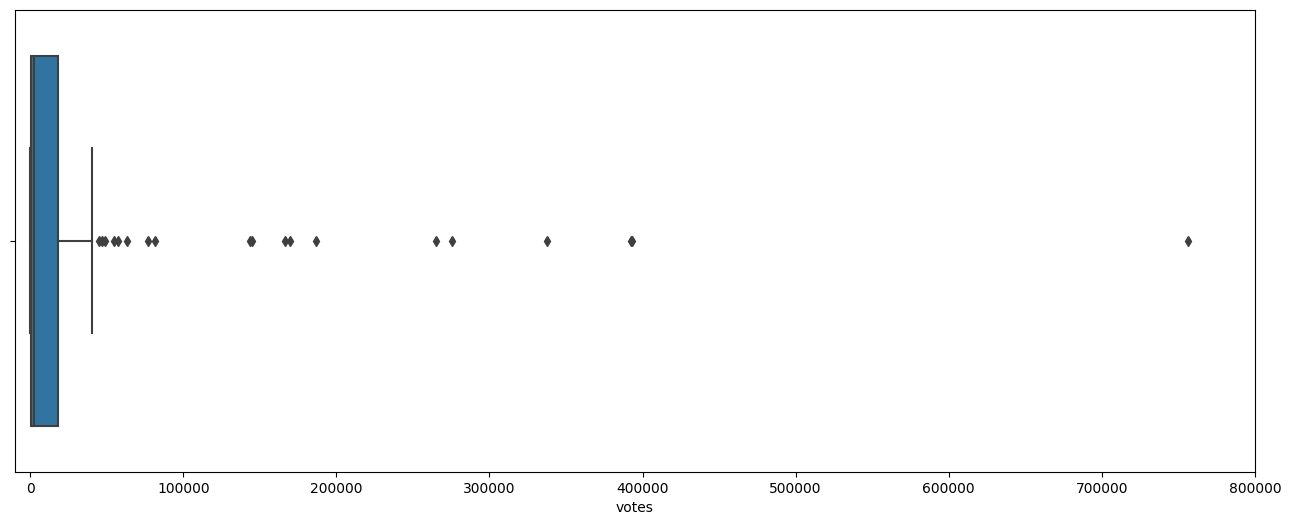

In [27]:
plt.figure(figsize=(16,6))
graf=sns.boxplot(x=anime_movies['votes']);
graf.set_xlim([-10000, 800000])  
anime_movies['votes'].describe()

count       100.000000
mean      41306.550000
std      107333.445459
min          10.000000
25%         414.500000
50%        2711.000000
75%       18069.500000
max      756112.000000
Name: votes, dtype: float64

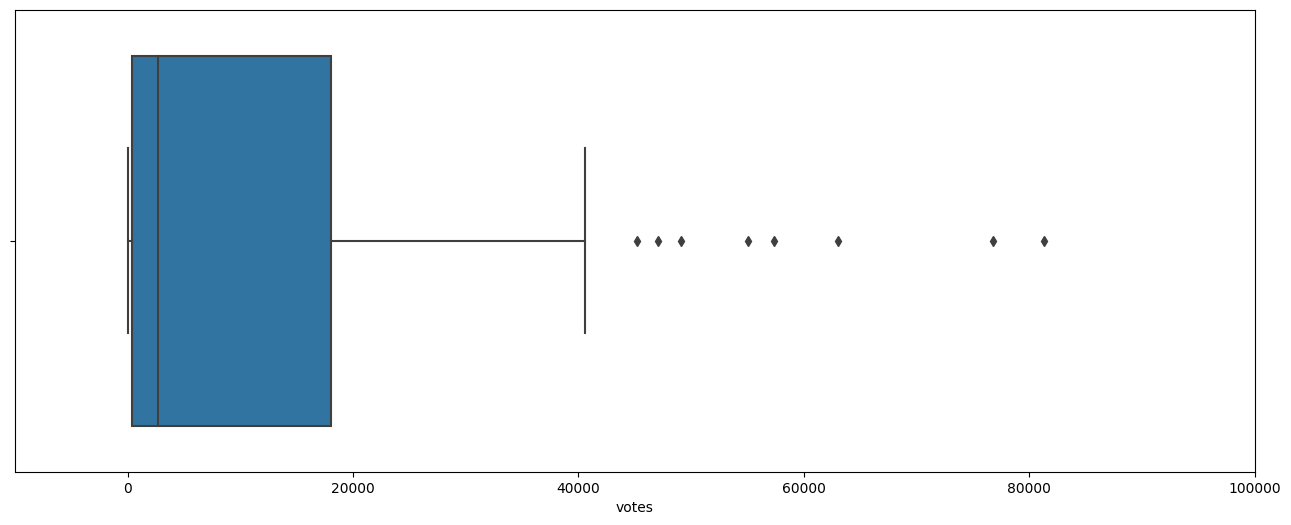

In [28]:
plt.figure(figsize=(16,6))
graf=sns.boxplot(x=anime_movies['votes']);
graf.set_xlim([-10000, 100000])  
anime_movies['votes'].describe()

count       100.000000
mean      41306.550000
std      107333.445459
min          10.000000
25%         414.500000
50%        2711.000000
75%       18069.500000
max      756112.000000
Name: votes, dtype: float64

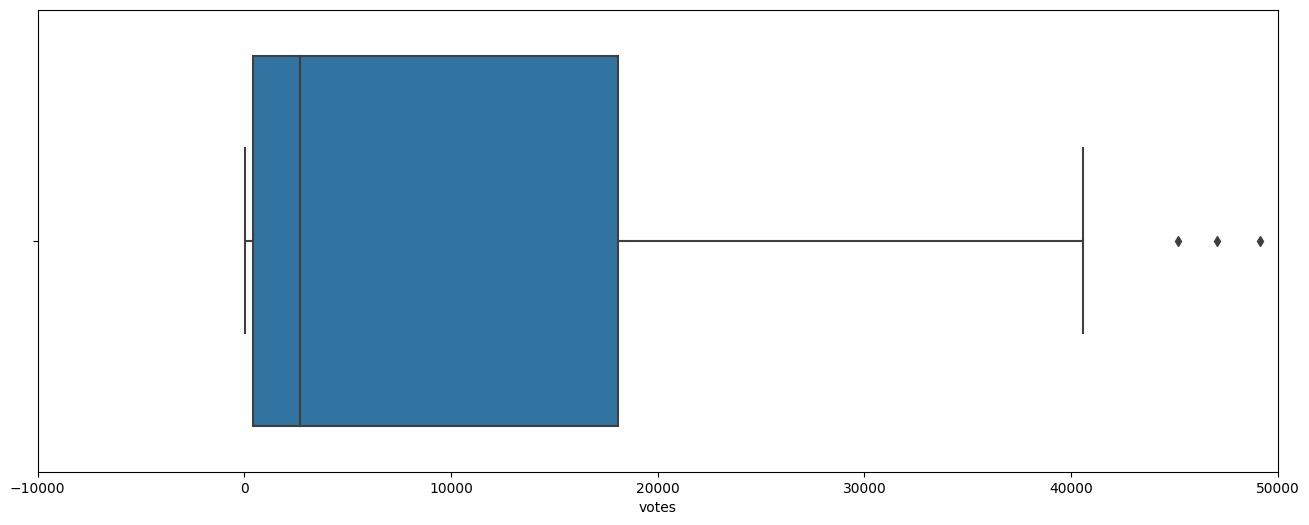

In [29]:
plt.figure(figsize=(16,6))
graf=sns.boxplot(x=anime_movies['votes']);
graf.set_xlim([-10000, 50000])  
anime_movies['votes'].describe()

**Comentarios y observaciones**:
Notamos que la diferencia entre el valor minimo y máximo es significativa, siendo el min 10.000000 y el máx  756112.000000, verificando dicha aseveración en los gráficos boxplots donde se aprecia una gran cantidad de outliers, adicionalmente, el Q1 es bastante inferior al Q2, donde la media esta por bajo los 5000, marcando una gran diferencia entre animes populares y otras producciones que no tuvieron tanto exito

### 2. Test de hipótesis **(45 pts.)**

La prueba de hipótesis es un área de la **Inferencia Estadística** que plantea una serie de métodos para decidir si una afirmación conocida ($H_0$) sobre una población se puede considerar aún plausible bajo la presencia de nuevos datos. 

> "El testeo de hipótesis es como un juicio legal. Asumimos que alguien es inocente hasta que haya evidencia suficiente que sugiera que es culpable. De la misma forma, mantenemos $H_0$ hasta que haya suficiente evidencia para rechazar $H_0$."


**2.1)** Defina brevemente los siguientes elementos fundamentales de una prueba de hipótesis **(8 pts.)**:
1. **Hipótesis nula $H_0$**: Es aquella hipotesis que se considera siempre verdadera hasta que se pueda encontrar evidencia de que esta es falsa.
2. **Hipótesis alternativa $H_1$**:  Es la hipotesis contraria a la nula, esta representa la conclusio que el investigador quiere confirmar u obtener con el estudio del problema.
3. **Estadístico de prueba**: Se utiliza en una prueba de hipotesis, por ejemplo decimos: $H_0$ es falseable y buscamos rechazarla mostrandonos a favor de $H_1$.
4. **P-Value**: Corresponde a la probabilidad que tendremos de un cierto valor estadistico calculado sea correcto o posible basandonos en una hipotesis nula determinada.
5. **Error de tipo 1**:  En este tipo de error se rechaza la hipotesis nula cuando esta es verdad es cierta, es decir que aunque $H_0$ sea real esta se rechazara sin comprobar.
6. **Error de tipo 2**: En este tipo de error No se rechaza la hipotesis nula apesar que esta resulte ser falsa, es decir que apesar que $H_0$ sea falsa esta se aceptara.
7. **Región crítica**:  Es la zona donde en una prueba estan los valores que rechazan la hipotesis nula, es decir si el estadistico cae en la region critica podemos rechazar $H_0$. 
8. **Posibles conclusiones derivadas de un test de hipótesis**: Luego de un test de hipoteis podemos comprobar que hipotesis es la correcta, es decir en el test podremos concluir si $H_0$ o $H_1$ es correcta o compatible con lo observado en la prueba realizada a nuestro espacio muestral.

**2.2)** ¿Por qué pueden ocurrir errores (de tipo 1 o 2) en una prueba de hipótesis? Considere que se trata de descartar o aceptar una aseveración realizada sobre una población en base a datos muestrales. **(2 pts.)**

**Respuesta**: 

Estos ocurren cuando en una investigación estamos en la formulacion de la hipotesis, ante eso deberemos establecer un intervalo matematico en el cual entraran los datos de la prueba que realizaremos para estudiar el caso, es decir ocurren porque aun no tenemos certeza de cual sera el resultado de nuestra prueba estadistica.

**2.3)** Defina la función `hypothesis_test(sample, null_value, alpha)`, la cual realiza un test de hipótesis considerando la muestra `sample` y las hipótesis $H_0: \mu = 20.5$ y $H_1: \mu \neq 20.5$ considerando un nivel de significancia $\alpha = 0.05$ y el promedio muestral como estadístico de prueba **(10 pts.)**.

*Hints*:
* El valor `z` es el estadístico de prueba, en este caso se corresponde con *z-test*.
* El valor `P_value` se calcula utilizando la `cdf` de una normal estándar.
* El rechazar o no la hipótesis nula dependerá de la relación que haya entre el `P_value` y el nivel de significancia `alpha`.
* La función retorna `False` si $H_0$ NO es rechazada, `True` en caso contrario.

In [30]:
sample = stats.norm.rvs(loc=21, scale=5, size=100)

def hypothesis_test(sample, null_value, alpha) -> bool:
    # Obtener los estadísticos de la muestra
    n = len(sample)
    sample_mean = sum(sample)/n
    sample_std = np.std(sample)

    # Obtener z (valor del estadístico de prueba)
    z = np.power(n,1/2)*(sample_mean-null_value)/(np.power(sample_std,2))

    # Obtener el P-value

    Z = stats.norm(0,1)
    P_value =Z.cdf(1-z)
    # Mostrar el P-value

    print(f"P-value is: {P_value}")

    # H0 es rechazada?


    if P_value>alpha:
        print("H0 is rejected")
        return True
    else: 
        print("H0 is not rejected")

        return False

In [31]:
hypothesis_test(sample, 20.5, 0.05)

P-value is: 0.5929770001183595
H0 is rejected


True

**2.4)** Comente los resultados del test de hipótesis realizado en el ítem anterior. Además, interprete el P-value obtenido. **(5 pts.)**

**Respuesta:** La H0 es rechazada, pues si corroboramos los datos obtenidos, la media del sample igresado no es 20,5, adicionalmente el p-value es mayor al alpha entregado, lo que indica que la probabilidad que Z > z es muy probable, descartando la hipotesis

**2.5)** ¿Qué ocurre con el resultado del test de hipótesis a medida que el tamaño de la muestra aumenta?, ¿por qué? **(5 pts.)**

**Respuesta:** A medida que el tamaño aumenta, la hipotesis tiende a ser aceptada, pues el p-value es mejor al alpha, esto indica que con pocos datos la varianza es demaciada para justificar la hipotesis.

**2.6)** Cuando el tamaño de la muestra es pequeño sabemos que el teorema del límite central es impreciso, lo que implica que nuestro test de hipótesis lo es también. Defina la función `hypothesis_test_2(sample, null_value, alpha)` que realiza un test de hipótesis como el del ítem **2.3** pero que permite evitar el problema mencionado respecto a las muestras pequeñas. **(10 pts.)**.

*Hint*: El `P_value` se obtiene utilizando una cdf de una distribución de probabilidad distinta a la normal estándar.

In [122]:
def hypothesis_test_2(sample,null_value,alpha):
    
    n = len(sample)
    print("tamaño: ",n)
    sample_mean=sum(sample)/n
    sample_std = np.std(sample)
    
    z = np.power(n,1/2)*(sample_mean-null_value)/np.power(sample_std,2)
    #print(z)
    Z=stats.binom(n,alpha)
    P_value=Z.cdf(z)
    print(P_value)
    if P_value>alpha:
        print("H0 is rejected")
        return True
    else: 
        print("H0 is not rejected")

        return False
    
    


**2.7)** ¿Cuál es el criterio para considerar *pequeño* el tamaño de una muestra? Inidique un `size` pequeño en la celda de código siguiente de acuerdo al criterio considerado y ejecute el test de hipótesis modificado a la muestra generada. **(5 pts.)**

**Respuesta**: Existe un valor de transición debajo del cual la H0 es rechazada y sobre el cual se acepta. Considerando muestras d

In [132]:
little_sample = stats.norm.rvs(loc=21, scale=5, size=100)
hypothesis_test_2(little_sample, 20.5, 0.05)

tamaño:  100
0.005920529220334028
H0 is not rejected


False